In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
DataX = pd.read_csv("Feature_selected.csv",index_col=0)
DataY = pd.read_csv("Processed_data.csv")['Actual']
X_train, X_test, y_train, y_test = train_test_split(DataX, DataY, test_size=0.25, shuffle = False)

# Loading the predictions from step 3 and 4 
y_pred = pd.read_csv("LR preds.csv")['y_pred'].to_numpy()
custom_preds = pd.read_csv("LR preds.csv")['custom_preds'].to_numpy()
preds_poly = pd.read_csv("non LR preds.csv")['preds_poly'].to_numpy()
y_pred_wls = pd.read_csv("non LR preds.csv")['y_pred_wls'].to_numpy()

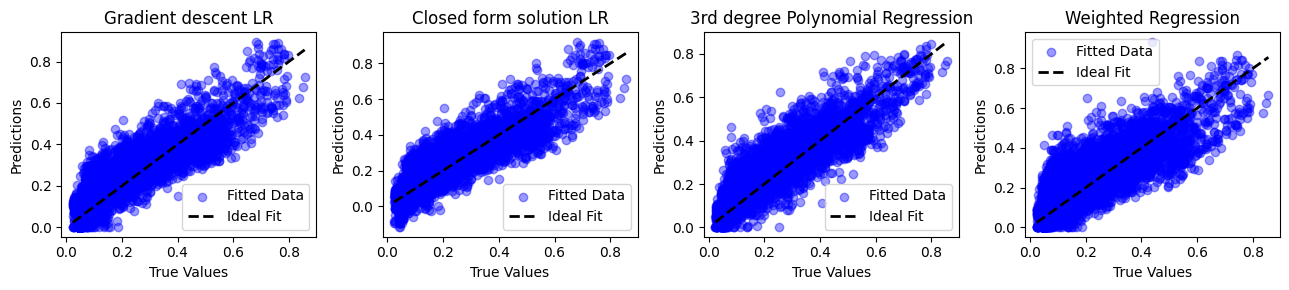

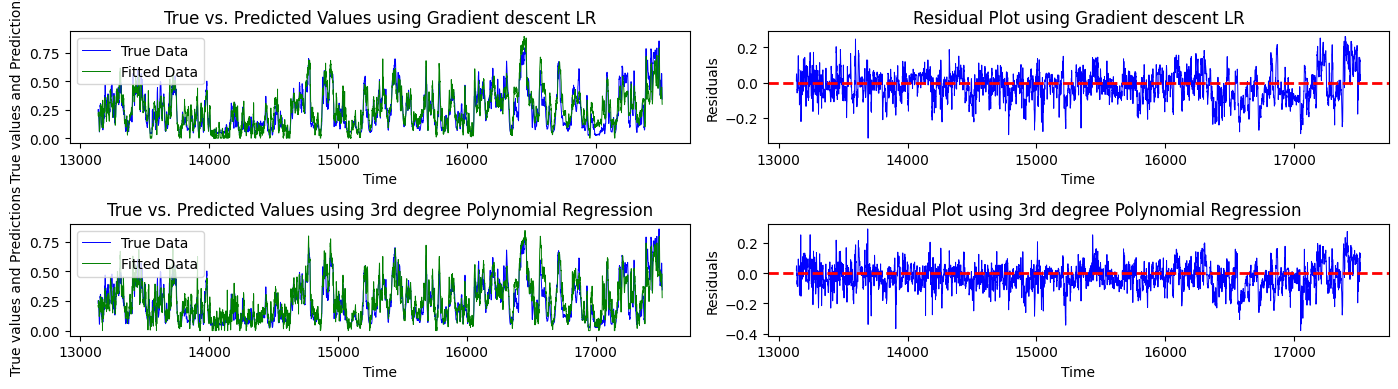

Under predicting LR: -179.70616656508378
Over predicting LR: 107.18957774400273
Under predicting non LR: -188.88016377287408
Over predicting non LR: 88.42193679375016


In [ ]:
plt.figure(figsize=(13, 3))

# Subplot 1
# Plotting the true values vs the fitted values for the gradient dscent algorithm with the whole data
plt.subplot(141)
plt.scatter(y_test, y_pred , c='b',alpha = 0.4, label='Fitted Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Gradient descent LR')
plt.legend()

# Subplot 2
# Plotting the true values vs the fitted values for the closed form solution with the whole data
plt.subplot(142) 
plt.scatter(y_test, custom_preds, alpha = 0.4, c='b', label='Fitted Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Closed form solution LR')
plt.legend()

# Subplot 3
# Plotting the true values vs the fitted values for the 3rd degree polynomial regression
plt.subplot(143) 
plt.scatter(y_test, preds_poly , alpha = 0.4, c='b', label='Fitted Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('3rd degree Polynomial Regression')
plt.legend()

# Subplot 4
# Plotting the residual values on the time series axis for the 3rd degree polynomial regression
plt.subplot(144) 
plt.scatter(y_test, y_pred_wls, alpha = 0.4,  c='b', label='Fitted Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Weighted Regression')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 4)) 

# Plotting the true values and fitted values on the time series axis for the the gradient dscent algorithm
plt.subplot(221)
plt.plot(y_test.index, y_test, alpha = 1,lw=0.7, c='b', label='True Data')
plt.plot(y_test.index, y_pred , alpha = 1,lw=0.7, c='g', label='Fitted Data')
plt.xlabel('Time')
plt.ylabel('True values and Predictions')
plt.title('True vs. Predicted Values using Gradient descent LR')
plt.legend()

residuals_LR = y_test - y_pred

# Plotting the residual values on the time series axis for the the gradient dscent algorithm
plt.subplot(222)
plt.plot(y_test.index , residuals_LR,lw=0.7, c='b')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residual Plot using Gradient descent LR')

# Plotting the true values and fitted values on the time series axis for the 3rd degree polynomial regression
plt.subplot(223)
plt.plot(y_test.index, y_test, alpha = 1,lw=0.7, c='b', label='True Data')
plt.plot(y_test.index, preds_poly , alpha = 1,lw=0.7, c='g', label='Fitted Data')
plt.xlabel('Time')
plt.ylabel('True values and Predictions')
plt.title('True vs. Predicted Values using 3rd degree Polynomial Regression')
plt.legend()

residuals_non_LR = y_test - preds_poly 

# Plotting the residual values on the time series axis for the 3rd degree polynomial regression
plt.subplot(224)
plt.plot(y_test.index , residuals_non_LR,lw=0.7, c='b')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residual Plot using 3rd degree Polynomial Regression')

plt.tight_layout()
plt.show()

print('Under predicting LR:',sum(residuals_LR[residuals_LR<0]))
print('Over predicting LR:',sum(residuals_LR[residuals_LR>0]))
print('Under predicting non LR:',sum(residuals_non_LR[residuals_non_LR<0]))
print('Over predicting non LR:',sum(residuals_non_LR[residuals_non_LR>0]))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=538942fa-4593-4d1a-b90d-2d23669fe78c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>